In [1]:
import pandas as pd

# Read Inflow Data
weather = pd.read_excel("WeatherData_1.xlsx", skiprows=1, names=["Date", "Rainfall depth (mm)", "Air temperature (°C)", "Air humidity (%)", "Windspeed (km/h)"])

# Read inflow data
inflow = pd.read_excel("InflowData_1.xlsx", skiprows=1, names=["Date", "DMA A", "DMA B", "DMA C", "DMA D", "DMA E", "DMA F", "DMA G", "DMA H", "DMA I", "DMA J"])

# Convert Date column to datetime format
weather['Date'] = pd.to_datetime(weather['Date'], format="%d/%m/%Y %H:%M")
inflow['Date'] = pd.to_datetime(inflow['Date'], format="%d/%m/%Y %H:%M")

# Merge inflow and weather data frames by "Date" column, retaining all rows from inflow
df_data = pd.merge(inflow, weather, on="Date", how="left")

# Remove duplicate rows based on the Date column, keeping only the first occurrence
df_data = df_data.drop_duplicates(subset='Date', keep='first')


In [6]:
# Calculate NA proportions for each column
na_proportions = df_data.isna().mean()

# Create a DataFrame with column names and NA proportions
na_summary = pd.DataFrame({
    'Column': na_proportions.index,
    'NA_Proportion': na_proportions.values
})

# Arrange the summary DataFrame by NA proportions in descending order
na_summary = na_summary.sort_values(by='NA_Proportion', ascending=False)

# Print the summary
print(na_summary)


                  Column  NA_Proportion
0                   Date            0.0
1                  DMA A            0.0
2                  DMA B            0.0
3                  DMA C            0.0
4                  DMA D            0.0
5                  DMA E            0.0
6                  DMA F            0.0
7                  DMA G            0.0
8                  DMA H            0.0
9                  DMA I            0.0
10                 DMA J            0.0
11   Rainfall depth (mm)            0.0
12  Air temperature (°C)            0.0
13      Air humidity (%)            0.0
14      Windspeed (km/h)            0.0


KeyError: 0

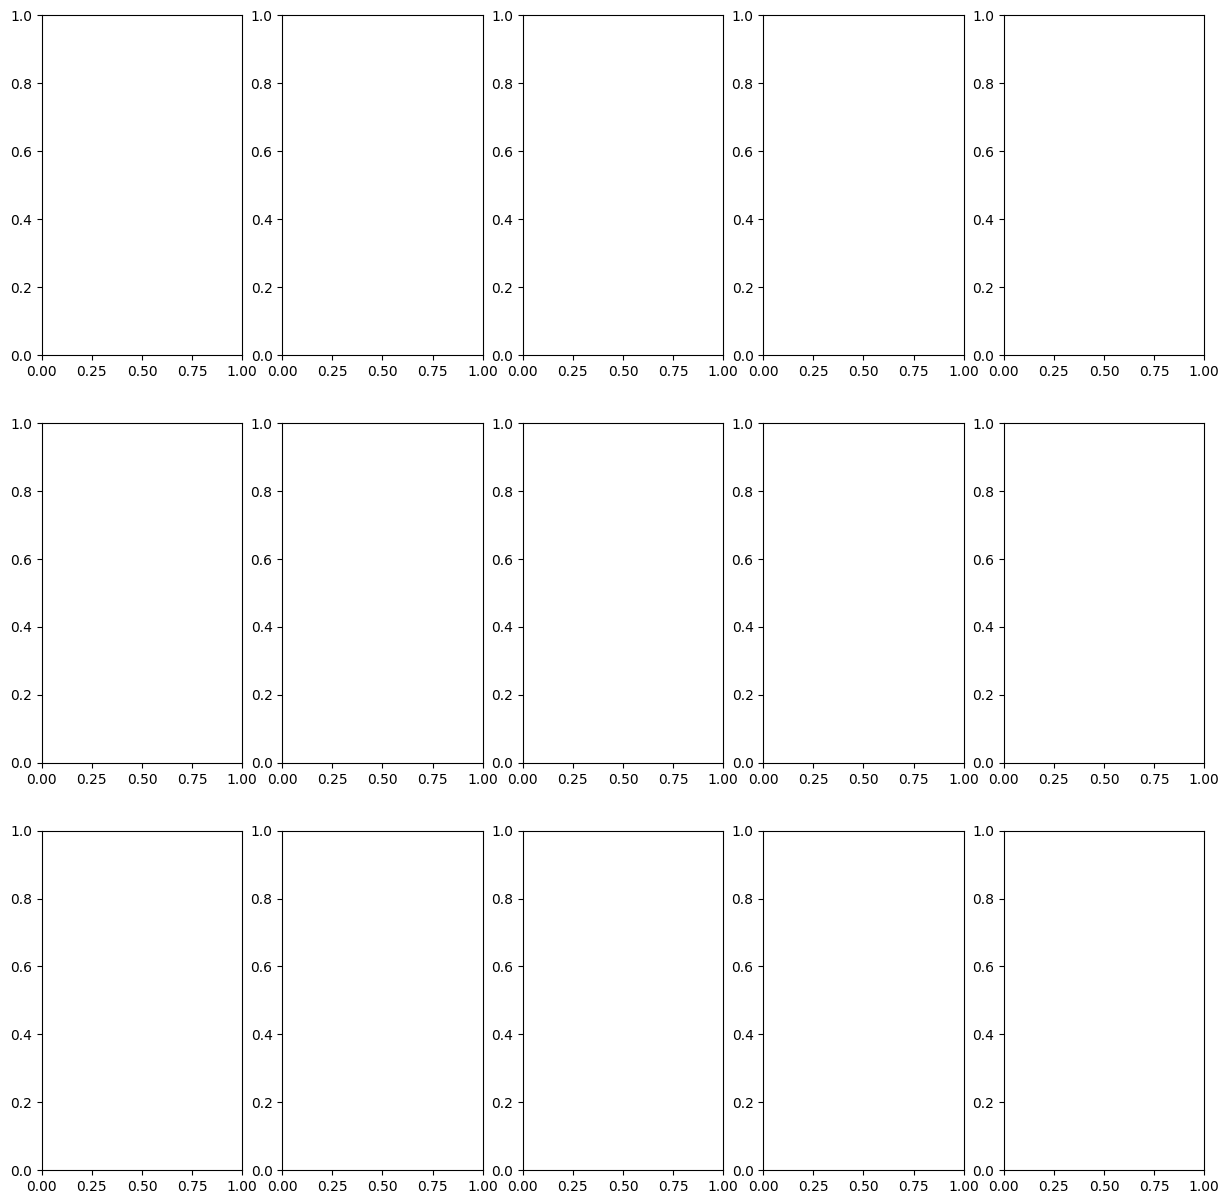

In [7]:
import matplotlib.pyplot as plt

# Identify numeric columns
numeric_cols = df_data.select_dtypes(include=['number']).columns

# Set up the plotting window to display multiple plots based on the number of numeric columns
num_plots = len(numeric_cols)
num_rows = int(num_plots ** 0.5)
num_cols = num_plots // num_rows + (num_plots % num_rows > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Loop through each numeric column to create a histogram
for i, col in enumerate(numeric_cols):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.hist(df_data[col], bins=20)
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Remove any empty subplots
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()
